In [46]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [47]:
# Parámetros del problema
S0 = 61
mu = 60
var = 10
sigma = np.sqrt(var)

PI_I = 0.4
PI_L = 0.5

In [48]:
def pi_LB(s):
    prob = 0.5 - 0.08*s
    return prob if prob > 0 else 0

def pi_LS(s):
    prob = 0.5 - 0.08*s
    return prob if prob > 0 else 0

f = lambda p: norm.pdf(p, mu, sigma)

def right(A):
    val, _ = quad(lambda p: (p - A) * f(p), A, np.inf)
    return val

def left(B):
    val, _ = quad(lambda p: (B - p) * f(p), 0, B)
    return val

def obj(x):
    bid, ask = x

    u_sell = pi_LB(ask - S0) * (ask - S0)
    u_buy  = pi_LS(S0 - bid) * (S0 - bid)
    u_total = PI_L * (u_sell + u_buy)

    loss_buy = right(ask)
    loss_sell = left(bid)
    loss_total = PI_I * (loss_buy + loss_sell)

    pnl = u_total - loss_total
    return -pnl

In [49]:
bnds = [(0, S0), (S0, np.inf)]

res = minimize(
    obj,
    x0 = [55, 65],
    bounds = bnds
)

opt_bid, opt_ask = res.x
profit_per_trade = -res.fun

print(f"Optimal Bid: {opt_bid:.2f}")
print(f"Optimal Ask: {opt_ask:.2f}")
print(f"Profit per Trade: {profit_per_trade:.2f}")

Optimal Bid: 57.01
Optimal Ask: 64.51
Profit per Trade: 0.58


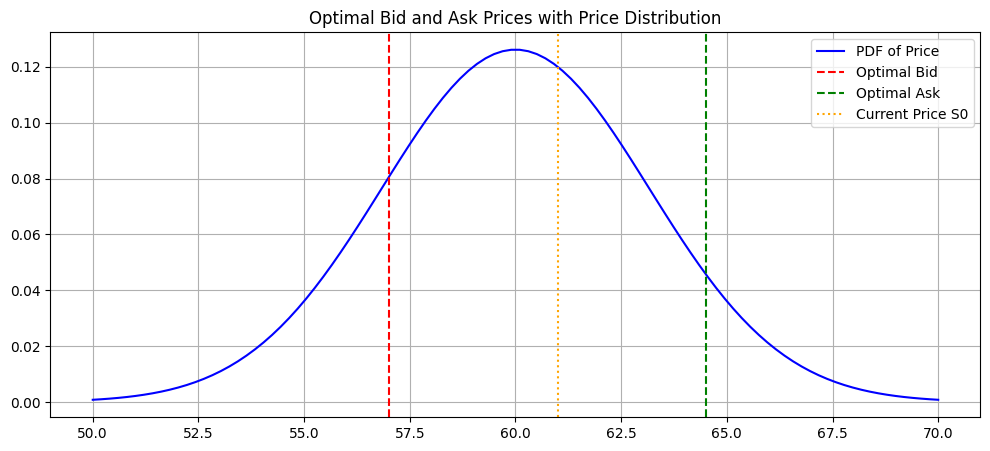

In [50]:
x_price = np.linspace(50, 70, 100)
probs = list(map(f, x_price))

plt.figure(figsize=(12, 5))
plt.plot(x_price, probs, label='PDF of Price', color='blue')
plt.axvline(opt_bid, color='red', linestyle='--', label='Optimal Bid')
plt.axvline(opt_ask, color='green', linestyle='--', label='Optimal Ask')
plt.axvline(S0, color='orange', linestyle=':', label='Current Price S0')
plt.title('Optimal Bid and Ask Prices with Price Distribution')
plt.legend()
plt.grid()
plt.show()

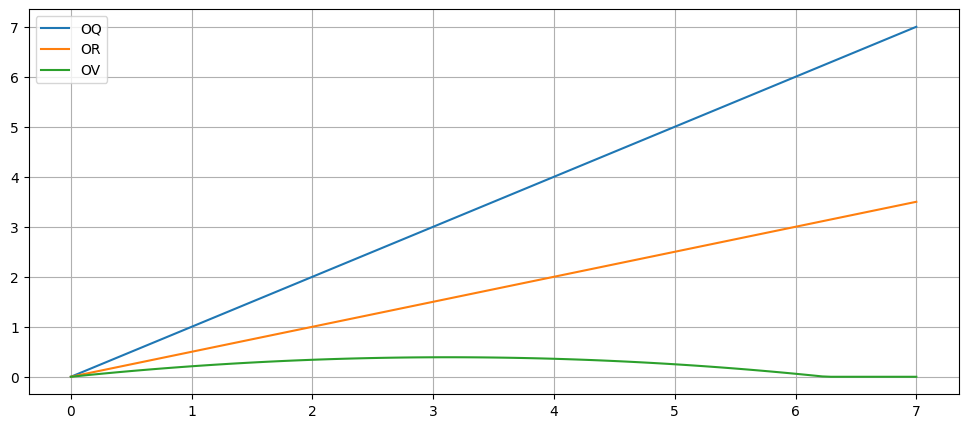

In [51]:
spreads = np.linspace(0, 7, 100)
probs_ = np.array(list(map(pi_LB, spreads)))

plt.figure(figsize=(12, 5))
plt.plot(spreads, spreads, label="OQ")
plt.plot(spreads, spreads * PI_L, label="OR")
plt.plot(spreads, spreads * PI_L * probs_, label="OV")

plt.grid()
plt.legend()
plt.show()